### L06 - Neurális hálozatos klasszifikáció

## Kézzel írott számjegyek II

A következő gyakorlat során neurális hálózatokat fogunk alkalmazni kézzel írott számok (0-9) felismerésére. Ezt a feladatot gyakran alkalmazzák a postai küldemények irányítószám felismerésétől egészen a bank csekkekig.

### 1: Szükséges csomagok beimportálása adatok beolvasása

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data = loadmat("Lab6data.mat")                          # adatok beolvasása
X = data["X"]
Y = data ["y"]
m = X.shape[0]                                          # adatok elrendezése
del data
print('''Shape of the dataset in order X and Y:
''',X.shape,'\n',Y.shape,'\n')

data = loadmat("Lab6weights.mat")                       # előre optimalizált súlyok beolvasása
w1 = data["Theta1"]
w2 = data["Theta2"]                                     # súlyok elrendezése
del data
print('''Shape of the weights in order 1 and 2:
''',w1.shape,'\n',w2.shape,'\n')


Shape of the dataset in order X and Y:
 (5000, 400) 
 (5000, 1) 

Shape of the weights in order 1 and 2:
 (25, 401) 
 (10, 26) 



### 2: Néhány adat bemutatása

Printing some random data ...


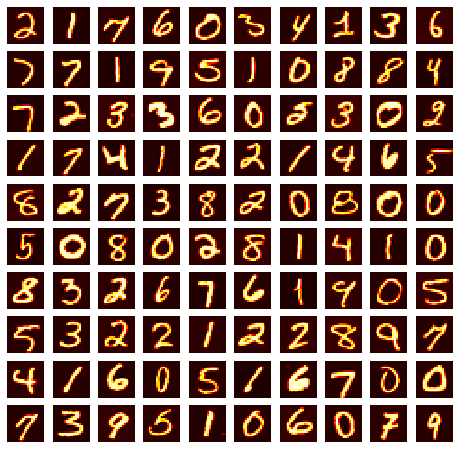

In [3]:
print("Printing some random data ...")
fig, ax = plt.subplots(10,10, figsize =(8,8))               # egy plotra több alplot = subplots (10x10 darab)
for i in range(10):
    for j in range(10):                                     # random adat mind a 100 helyre
        ax[i,j].imshow(X[np.random.randint(0,m+1),:].reshape(20,20, order = "F"), cmap="hot")
        ax[i,j].axis("off")
plt.show()

### 3: Predikció és annak pontossága

In [4]:
def sigmoid(z):                                                  # szigmoig függvény definíciója
    return 1/(1+np.exp(-z))

def predict(w1,w2,X):                                            # predikciós függvény definíciója
    m = X.shape[0]

    a1 = np.column_stack((np.ones((m,1)),X))                     # bemeneti réget előkészítése
    z2 = a1 @ w1.T                                               # átmenet
    a2 = np.column_stack((np.ones((m,1)),sigmoid(z2)))           # rejtett réget
    z3 = a2 @ w2.T                                               # átmenet
    a3 = sigmoid(z3)                                             # kimeneti réget

    return np.argmax(a3,axis=1)+1                                # eredmény (a maximuma az a3-nak)

def accuracy(pred,Y):                                            # pontosság függvény definíciója
    return (np.sum(pred[:,np.newaxis]==Y)/5000)*100              # predikció vektora megegyezik az Y-al / mintaszám * 100%


pred = predict(w1,w2,X)
print('\nTraining set Accuracy: ', accuracy(pred,Y), ' %')


Training set Accuracy:  97.52  %


### 4: adatok és predikció bemutatása

Showing You a: 4 the prediction was: 4 ,Y value was: [4]


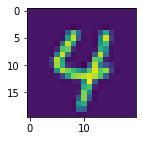

In [6]:
import random
i= random.randint(1,m+1)

print('Showing You a:',pred[i]%10, 'the prediction was:',pred[i], ',Y value was:',Y[i])
fig = plt.figure(figsize=(2,2))
plt.imshow(X[i,:].reshape(20,20).T)
plt.show()